In [4]:
import pandas as pd
import numpy as np
from openff.toolkit.topology import Molecule
from openff.units import unit
import seaborn as sb
from scipy import stats
import matplotlib.pyplot as plt
from rdkit.Chem import Draw
from chargecraft.storage.storage import MoleculePropStore
from rdkit.Chem import AllChem

def equalityline(x, y, ax = None, **kwargs):
    x0, x1 = min(x), max(x)
    y0, y1 = min(y), max(y)
    lims = [min(x0, y0), max(x1, y1)]
    ax = ax or plt.gca()
    ax.plot(lims, lims, **kwargs)

def m(x, y, ax = None, **kwargs):
    
    x = np.array(x)
    y = np.array(y)
    ax = ax or plt.gca()
    m =(np.sum((x - y)**2, axis=0)/(y.shape[0]))**0.5
    ax.annotate(f'$RMSE= {float(m):.2f}$',
                xy=(.01, .99), xycoords=ax.transAxes, fontsize=8,
                color='darkred', backgroundcolor='#FFFFFF99', ha='left', va='top')   
    
def kde(x, y, ax = None, **kwargs):
    if isinstance(x, np.ndarray) and isinstance(y, np.ndarray):
        x = np.array(x)
        y = np.array(y)
    ax = ax or plt.gca()
    kernel = stats.gaussian_kde(x)(y)
    ax.scatter(x, y, c=kernel, s=5)

In [5]:
parquet = "./grouped_wb97x.parquet"
df = pd.read_parquet(parquet)
df

,mbis_charges,am1bcc_charges,espaloma_charges,riniker_monopoles,resp_charges,qm_dipoles,mbis_dipoles,am1bcc_dipole,espaloma_dipole,riniker_dipoles,...,esp_model_charges,esp_model_dipoles,esp_model_esp,esp_model_esp_rmse,molecule,grid,geometry,conformer_no,smiles,energy
0,"[-0.16268842611744566, -0.04862053211163669, -...","[0.07483121875000001, 0.10543121875, -0.388968...","[0.08158419548999518, 0.18139159574639052, -0....",None,"[-0.29, 0.1213, -0.3505, 0.8191, -0.2951, -0.3...",1.635670,1.773238,2.488876,2.094020,NaN,...,"[-0.17407569289207458, -0.06268748641014099, -...",1.669328,"[0.06619311124010822, 0.06527561996311568, 0.0...",1.525523,[C:1]([C:2]([O:3][N+:4](=[O:5])[O-:6])([H:22])...,"[[-6.363961030844296, -4.596194077712559, 0.17...","[0.5245067775886751, 1.3887068569374834, 0.041...",0,[H][C]([H])([O][N+](=[O])[O-])[C]([H])([H])[N+...,-1131.912536
1,"[-0.15355895134911451, -0.03371448190417054, -...","[0.06876874999999999, 0.11603575, -0.34869825,...","[0.08158419548999518, 0.18139159574639052, -0....",None,"[-0.0073, -0.0954, -0.2803, 0.7953, -0.3132, -...",1.501376,1.659710,1.265666,1.042737,NaN,...,"[-0.17407569289207458, -0.06268748641014099, -...",1.394694,"[0.05591529785033846, 0.05506649545164193, 0.0...",1.704142,[C:1]([C:2]([O:3][N+:4](=[O:5])[O-:6])([H:22])...,"[[-6.717514421272201, -4.242640686788549, -0.2...","[0.220854662951723, 1.3404666431462458, -0.620...",1,[H][C]([H])([O][N+](=[O])[O-])[C]([H])([H])[N+...,-1131.915180
2,"[-0.1684974792991123, -0.019096709438609166, -...","[0.06449831250000002, 0.1227643125, -0.3509686...","[0.08158419548999518, 0.18139159574639052, -0....",None,"[0.0626, 0.0516, -0.0984, 0.1955, -0.0937, -0....",2.835775,3.151387,3.223006,3.457578,NaN,...,"[-0.17407569289207458, -0.06268748641014099, -...",4.027300,"[0.046932938431235034, 0.047190324197568606, 0...",7.907012,[C:1]([C:2]([O:3][N+:4](=[O:5])[O-:6])([H:22])...,"[[-8.131727983810665, -2.1213203437250105, -0....","[0.9013192917912045, 0.9340590475005371, 1.580...",2,[H][C]([H])([O][N+](=[O])[O-])[C]([H])([H])[N+...,-1131.784877
3,"[-0.17054456335625917, -0.04173740410952515, -...","[0.06846703125, 0.10273303125000002, -0.375332...","[0.08158419548999518, 0.18139159574639052, -0....",None,"[-0.1912, -0.0076, -0.2944, 0.7857, -0.3141, -...",2.407196,2.540471,1.878216,2.269720,NaN,...,"[-0.17407569289207458, -0.06268748641014099, -...",2.270808,"[0.05624356922225765, 0.05509217848525904, 0.0...",1.767778,[C:1]([C:2]([O:3][N+:4](=[O:5])[O-:6])([H:22])...,"[[-7.071067812030843, -2.82842712474619, 0.707...","[1.3869839276737954, -0.985736583157418, -0.86...",3,[H][C]([H])([O][N+](=[O])[O-])[C]([H])([H])[N+...,-1131.917196
4,"[-0.17636289708512914, -0.038781843962180595, ...","[0.0697999375, 0.1093999375, -0.3506670625, 0....","[0.08158419548999518, 0.18139159574639052, -0....",None,"[-0.2621, 0.0025, -0.317, 0.8059, -0.2964, -0....",1.877543,2.018615,2.119655,1.970021,NaN,...,"[-0.17407569289207458, -0.06268748641014099, -...",1.747629,"[0.06818324710986211, 0.06453900472447659, 0.0...",1.642607,[C:1]([C:2]([O:3][N+:4](=[O:5])[O-:6])([H:22])...,"[[-6.363961030844296, 3.889087296526011, -0.44...","[-0.2138980073457847, -0.9000454537580292, 0.5...",4,[H][C]([H])([O][N+](=[O])[O-])[C]([H])([H])[N+...,-1131.915122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,"[-0.5012527151778318, 0.31974086288271847, -0....","[-0.05091747368421051, -0.040317473684210514, ...","[-0.10983861767147717, 0.27650559164191546, -0...",None,"[-0.7274, 0.332, -0.4863, 0.1052, 0.0589, -0.3...",2.123525,2.139476,2.167373,4.823668,NaN,...,"[-0.5038095712661743, 0.2881072461605072, -0.3...",2.210272,"[0.057353928879449075, 0.05856501950330394, 0....",4.753354,[C:1]([C:2]1=[C:3]([H:32])[c:4]2[c:5]([c:7]([H...,"[[-9.19238815533228, -4.9497474683986695, 1.76...","[6.087239645337582, 2.181680386761085, -1.7047...",4,[H][C]1=[C]([C]([H])([H])[H])[N]([H])[c]2[c]([...,-1228.990226
401,"[-0.5046633399195547, 0.32169282861

In [6]:
#merge the hf data into this
parquet = "../charge_models_am1bcc_default.parquet" #/Users/k2584788/charge_paper/conformer_test/charge_models_am1bcc_default.parquet
hf_df= pd.read_parquet(parquet)
hf_df = hf_df.rename(columns={'am1bcc_esp_rms': 'am1bcc_esp_rms_hf'})
df = pd.merge(
    df,
    hf_df[['molecule', 'conformer_no', 'am1bcc_esp_rms_hf']],
    on=['molecule', 'conformer_no'],
    how='left'  # Using left join ensures all rows in dft_df are kept
)


In [7]:
df

,mbis_charges,am1bcc_charges,espaloma_charges,riniker_monopoles,resp_charges,qm_dipoles,mbis_dipoles,am1bcc_dipole,espaloma_dipole,riniker_dipoles,...,esp_model_dipoles,esp_model_esp,esp_model_esp_rmse,molecule,grid,geometry,conformer_no,smiles,energy,am1bcc_esp_rms_hf
0,"[-0.16268842611744566, -0.04862053211163669, -...","[0.07483121875000001, 0.10543121875, -0.388968...","[0.08158419548999518, 0.18139159574639052, -0....",None,"[-0.29, 0.1213, -0.3505, 0.8191, -0.2951, -0.3...",1.635670,1.773238,2.488876,2.094020,NaN,...,1.669328,"[0.06619311124010822, 0.06527561996311568, 0.0...",1.525523,[C:1]([C:2]([O:3][N+:4](=[O:5])[O-:6])([H:22])...,"[[-6.363961030844296, -4.596194077712559, 0.17...","[0.5245067775886751, 1.3887068569374834, 0.041...",0,[H][C]([H])([O][N+](=[O])[O-])[C]([H])([H])[N+...,-1131.912536,7.295505
1,"[-0.15355895134911451, -0.03371448190417054, -...","[0.06876874999999999, 0.11603575, -0.34869825,...","[0.08158419548999518, 0.18139159574639052, -0....",None,"[-0.0073, -0.0954, -0.2803, 0.7953, -0.3132, -...",1.501376,1.659710,1.265666,1.042737,NaN,...,1.394694,"[0.05591529785033846, 0.05506649545164193, 0.0...",1.704142,[C:1]([C:2]([O:3][N+:4](=[O:5])[O-:6])([H:22])...,"[[-6.717514421272201, -4.242640686788549, -0.2...","[0.220854662951723, 1.3404666431462458, -0.620...",1,[H][C]([H])([O][N+](=[O])[O-])[C]([H])([H])[N+...,-1131.915180,6.433189
2,"[-0.1684974792991123, -0.019096709438609166, -...","[0.06449831250000002, 0.1227643125, -0.3509686...","[0.08158419548999518, 0.18139159574639052, -0....",None,"[0.0626, 0.0516, -0.0984, 0.1955, -0.0937, -0....",2.835775,3.151387,3.223006,3.457578,NaN,...,4.027300,"[0.046932938431235034, 0.047190324197568606, 0...",7.907012,[C:1]([C:2]([O:3][N+:4](=[O:5])[O-:6])([H:22])...,"[[-8.131727983810665, -2.1213203437250105, -0....","[0.9013192917912045, 0.9340590475005371, 1.580...",2,[H][C]([H])([O][N+](=[O])[O-])[C]([H])([H])[N+...,-1131.784877,6.797593
3,"[-0.17054456335625917, -0.04173740410952515, -...","[0.06846703125, 0.10273303125000002, -0.375332...","[0.08158419548999518, 0.18139159574639052, -0....",None,"[-0.1912, -0.0076, -0.2944, 0.7857, -0.3141, -...",2.407196,2.540471,1.878216,2.269720,NaN,...,2.270808,"[0.05624356922225765, 0.05509217848525904, 0.0...",1.767778,[C:1]([C:2]([O:3][N+:4](=[O:5])[O-:6])([H:22])...,"[[-7.071067812030843, -2.82842712474619, 0.707...","[1.3869839276737954, -0.985736583157418, -0.86...",3,[H][C]([H])([O][N+](=[O])[O-])[C]([H])([H])[N+...,-1131.917196,6.039516
4,"[-0.17636289708512914, -0.038781843962180595, ...","[0.0697999375, 0.1093999375, -0.3506670625, 0....","[0.08158419548999518, 0.18139159574639052, -0....",None,"[-0.2621, 0.0025, -0.317, 0.8059, -0.2964, -0....",1.877543,2.018615,2.119655,1.970021,NaN,...,1.747629,"[0.06818324710986211, 0.06453900472447659, 0.0...",1.642607,[C:1]([C:2]([O:3][N+:4](=[O:5])[O-:6])([H:22])...,"[[-6.363961030844296, 3.889087296526011, -0.44...","[-0.2138980073457847, -0.9000454537580292, 0.5...",4,[H][C]([H])([O][N+](=[O])[O-])[C]([H])([H])[N+...,-1131.915122,6.051934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,"[-0.5012527151778318, 0.31974086288271847, -0....","[-0.05091747368421051, -0.040317473684210514, ...","[-0.10983861767147717, 0.27650559164191546, -0...",None,"[-0.7274, 0.332, -0.4863, 0.1052, 0.0589, -0.3...",2.123525,2.139476,2.167373,4.823668,NaN,...,2.210272,"[0.057353928879449075, 0.05856501950330394, 0....",4.753354,[C:1]([C:2]1=[C:3]([H:32])[c:4]2[c:5]([c:7]([H...,"[[-9.19238815533228, -4.9497474683986695, 1.76...","[6.087239645337582, 2.181680386761085, -1.7047...",4,[H][C]1=[C]([C]([H])([H])[H])[N]([H])[c]2[c]([...,-1228.990226,2.623295
401,"[-0.5046633399195547, 0.32169282861653126, -0....","[-0.051899947368421046, -0.039299947368421045,...","[-0.10983861767147717, 0.27650559164191546, -0...",None,"[-0.9122, 0.2679, -0.3442, 0.0575, 0.0489, -0....",1.853488,2.338880,2.560352,4.914295,NaN,...,2.319452,"[0.05750011059228832, 0.058

In [15]:
df['am1bcc_charges']

0      [0.07483121875000001, 0.10543121875, -0.388968...
1      [0.06876874999999999, 0.11603575, -0.34869825,...
2      [0.06449831250000002, 0.1227643125, -0.3509686...
3      [0.06846703125, 0.10273303125000002, -0.375332...
4      [0.0697999375, 0.1093999375, -0.3506670625, 0....
                             ...                        
400    [-0.05091747368421051, -0.040317473684210514, ...
401    [-0.051899947368421046, -0.039299947368421045,...
402    [-0.05691750877192981, -0.01731750877192981, -...
403    [-0.04988252631578947, -0.043282526315789466, ...
404    [-0.05084738596491228, -0.03824738596491228, -...
Name: am1bcc_charges, Length: 405, dtype: object

In [ ]:

# Your DataFrame is assumed to be named `df`

# Define the three problematic entries
failures = [
    {'molecule': '[C:1]([C:2]([N+:3]([C:4]([C:5](=[O:6])[O-:7])([H:33])[H:34])([C:8]([C:9](=[O:10])[O-:11])([H:35])[H:36])[H:32])([H:30])[H:31])([N+:12]([C:13]([C:14]([N+:15]([C:16]([C:17](=[O:18])[O-:19])([H:43])[H:44])([C:20]([C:21](=[O:22])[O-:23])([H:45])[H:46])[H:42])([H:40])[H:41])([H:38])[H:39])([C:24]([C:25](=[O:26])[O-:27])([H:47])[H:48])[H:37])([H:28])[H:29]',
     'conformer_no': 2},
    {'molecule': '[C:1]([C:2](=[O:3])[O:4][C:5]([C:6]1=[C:7]([C:24](=[O:25])[O-:26])[N:8]2[C@@:9]([H:32])([C@@:10]([N:13]([C:14](=[O:15])[C:16]([C:17]3=[C:18]([H:37])[C:19]([H:38])=[C:20]([H:39])[S:21]3)([H:35])[H:36])[H:34])([H:33])[C:11]2=[O:12])[S:22][C:23]1([H:40])[H:41])([H:30])[H:31])([H:27])([H:28])[H:29]'},
    {'molecule': '[C:1]([C:2]([C:3]([C:4]([C:5]([C@@:6]([C:7]([H:38])([H:39])[H:40])(/[C:8](=[C:9](/[C@:10]1([H:43])[C@@:11]([O:25][H:60])([H:44])[C:12]([H:45])([H:46])[C@@:13]([O:24][H:59])([H:47])[C@@:14]1([C:15]([C:16](=[C:17]([C:18]([C:19]([C:20]([C:21](=[O:22])[O-:23])([H:57])[H:58])([H:55])[H:56])([H:53])[H:54])[H:52])[H:51])([H:49])[H:50])[H:48])[H:42])[H:41])[O:26][H:61])([H:36])[H:37])([H:34])[H:35])([H:32])[H:33])([H:30])[H:31])([H:27])([H:28])[H:29]',
     'conformer_no': 6},
    {'molecule': '[C:1]([C:2]([C:3](=[O:4])[N:5]([C@@:6]([C:7]([S:8][H:29])([H:27])[H:28])([C:9](=[O:10])[N:11]([C:12]([C:13](=[O:14])[O-:15])([H:31])[H:32])[H:30])[H:26])[H:25])([H:23])[H:24])([C@@:16]([C:17](=[O:18])[O-:19])([N+:20]([H:34])([H:35])[H:36])[H:33])([H:21])[H:22]',
    'conformer_no': 1},
    {'molecule': '[C:1]([C:2]([O:3][N+:4](=[O:5])[O-:6])([H:22])[H:23])([N+:7]([C:8]([C:9]([O:10][N+:11](=[O:12])[O-:13])([H:27])[H:28])([H:25])[H:26])([C:14]([C:15]([O:16][N+:17](=[O:18])[O-:19])([H:31])[H:32])([H:29])[H:30])[H:24])([H:20])[H:21]',
     'conformer_no': 1},
    {'molecule': '[C:1]([C:2]([O:3][N+:4](=[O:5])[O-:6])([H:22])[H:23])([N+:7]([C:8]([C:9]([O:10][N+:11](=[O:12])[O-:13])([H:27])[H:28])([H:25])[H:26])([C:14]([C:15]([O:16][N+:17](=[O:18])[O-:19])([H:31])[H:32])([H:29])[H:30])[H:24])([H:20])[H:21]',
     'conformer_no': 6},
    {'molecule':'[C:1]([C:2]([C:3](=[O:4])[N:5]([C@@:6]([C:7]([S:8][H:29])([H:27])[H:28])([C:9](=[O:10])[N:11]([C:12]([C:13](=[O:14])[O-:15])([H:31])[H:32])[H:30])[H:26])[H:25])([H:23])[H:24])([C@@:16]([C:17](=[O:18])[O-:19])([N+:20]([H:34])([H:35])[H:36])[H:33])([H:21])[H:22]',
     'conformer_no': 0},

]

# Build a mask to filter them out
mask = pd.Series([True] * len(df))  # Start with all True

for f in failures:
    submask = (df['molecule'] == f['molecule'])
    if 'conformer_no' in f:
        submask &= (df['conformer_no'] == f['conformer_no'])
    mask &= ~submask  # Negate submask to drop the failures

# Apply the mask to get the filtered DataFrame
filtered_df = df[mask]
filtered_df


In [9]:
df.to_csv("chargecraft_dft_am1bcc.csv")

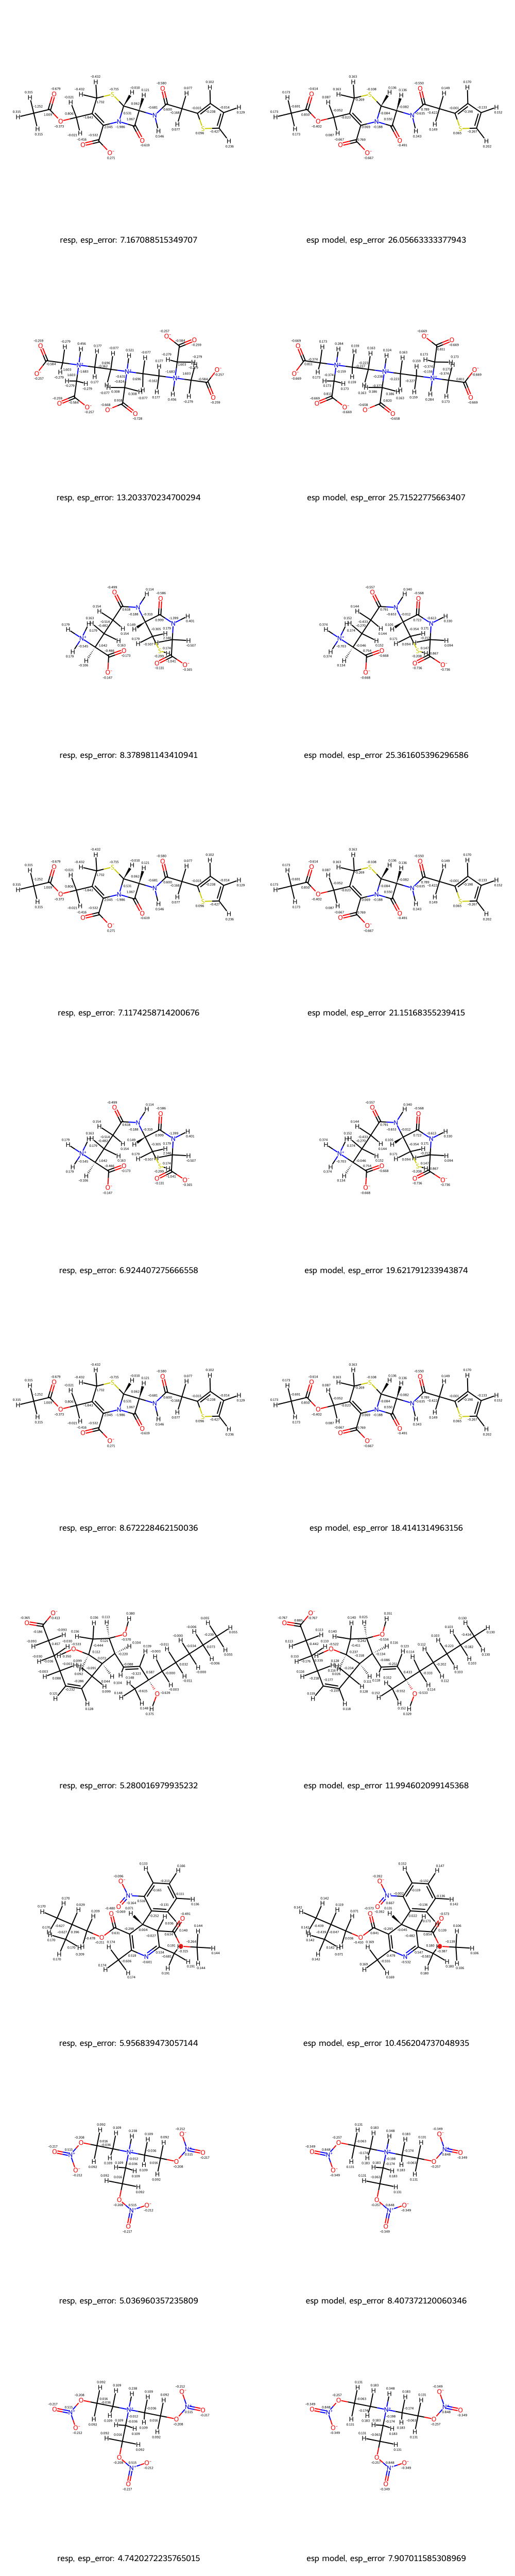

In [10]:
def label_rdkit(molecule, charges):
    AllChem.Compute2DCoords(molecule)

    for i, atom in enumerate(molecule.GetAtoms()):
        lbl = '%.3f' % (charges[i])
        atom.SetProp('atomNote', lbl)
    return molecule

rows_to_analyse = df.sort_values('esp_model_esp_rmse', ascending=False).iloc[:10]
rdkit_molecules = []
labels = []

for row in rows_to_analyse.iterrows():
    row = row[-1]
    tagged_smiles = row['molecule']
    openff = Molecule.from_mapped_smiles(tagged_smiles, allow_undefined_stereo=True)
    geometry = row['geometry'].reshape(-1,3) * unit.angstrom
    openff.add_conformer(geometry)
    resp_mol = openff.to_rdkit()
    resp_multi_mol = label_rdkit(resp_mol, row['resp_multiconf_charges'])
    labels.append(f'resp, esp_error: {row["resp_multiconf_esp_rmse"]}')
    rdkit_molecules.append(resp_multi_mol)
    esp_mol = openff.to_rdkit()
    esp_multi_mol = label_rdkit(esp_mol, row['esp_model_charges'])
    rdkit_molecules.append(esp_multi_mol)
    labels.append(f'esp model, esp_error {row["esp_model_esp_rmse"]}')

Draw.MolsToGridImage(rdkit_molecules, molsPerRow=2, legends=labels, subImgSize=(500,500))

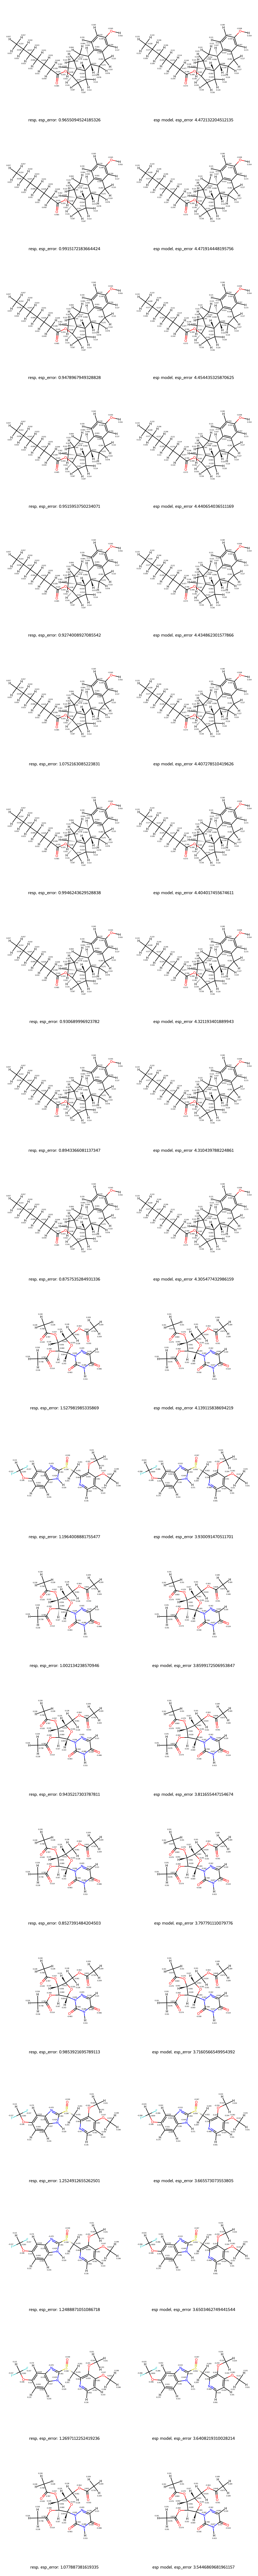

In [11]:
def label_rdkit(molecule, charges):
    AllChem.Compute2DCoords(molecule)
    for i, atom in enumerate(molecule.GetAtoms()):
        lbl = '%.3f' % (charges[i])
        atom.SetProp('atomNote', lbl)
    return molecule

rows_to_analyse = df.sort_values('esp_model_esp_rmse', ascending=False)
rows_to_analyse = rows_to_analyse[
    ~(rows_to_analyse['molecule'].str.contains("+", regex = False))  &
    ~(rows_to_analyse['molecule'].str.contains("-", regex = False))
].iloc[:20]
rdkit_molecules = []
labels = []

for row in rows_to_analyse.iterrows():
    row = row[-1]
    tagged_smiles = row['molecule']
    openff = Molecule.from_mapped_smiles(tagged_smiles, allow_undefined_stereo=True)
    geometry = row['geometry'].reshape(-1,3) * unit.angstrom
    openff.add_conformer(geometry)
    resp_mol = openff.to_rdkit()
    resp_multi_mol = label_rdkit(resp_mol, row['resp_multiconf_charges'])
    labels.append(f'resp, esp_error: {row["resp_multiconf_esp_rmse"]}')
    rdkit_molecules.append(resp_multi_mol)
    esp_mol = openff.to_rdkit()
    esp_multi_mol = label_rdkit(esp_mol, row['esp_model_charges'])
    rdkit_molecules.append(esp_multi_mol)
    labels.append(f'esp model, esp_error {row["esp_model_esp_rmse"]}')

Draw.MolsToGridImage(rdkit_molecules, molsPerRow=2, legends=labels, subImgSize=(500,500))

In [12]:
df.columns

Index(['mbis_charges', 'am1bcc_charges', 'espaloma_charges',
       'riniker_monopoles', 'resp_charges', 'qm_dipoles', 'mbis_dipoles',
       'am1bcc_dipole', 'espaloma_dipole', 'riniker_dipoles', 'resp_dipole',
       'am1bcc_esp_rms', 'am1bcc_esp', 'espaloma_esp_rms', 'espaloma_esp',
       'resp_esp_rms', 'resp_esp', 'mbis_esp_rms', 'mbis_esp',
       'riniker_esp_rms', 'riniker_esp', 'qm_esp', 'mol_id',
       'resp_multiconf_esp', 'am1bcc_multiconf_esp', 'resp_multiconf_esp_rmse',
       'am1bcc_multiconf_esp_rmse', 'resp_multiconf_charges',
       'am1bccc_multiconf_charges', 'resp_multiconf_dipoles',
       'am1bcc_multiconf_dipoles', 'charge_model_charges',
       'charge_model_dipoles', 'charge_model_esp', 'charge_model_esp_rmse',
       'dipole_model_charges', 'dipole_model_dipoles', 'dipole_model_esp',
       'dipole_model_esp_rmse', 'esp_model_charges', 'esp_model_dipoles',
       'esp_model_esp', 'esp_model_esp_rmse', 'molecule', 'grid', 'geometry',
       'conformer_no', 

['charge_modele', 'am1bcc_hf', 'dipole_modele', 'esp_modele', 'resp_multiconfe']


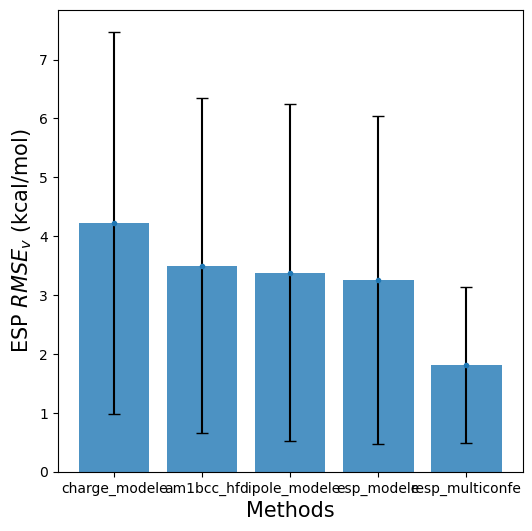

In [13]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Define the columns to compare
compare_columns = ['resp_multiconf_esp_rmse', 'charge_model_esp_rmse', 'dipole_model_esp_rmse', 'esp_model_esp_rmse','am1bcc_esp_rms_hf']

# Calculate mean and standard deviation for the columns
mean_values = df[compare_columns].mean()
std_dev_values = df[compare_columns].std()

# Create a DataFrame for easy sorting and plotting
mean_values_df = pd.DataFrame({
    'mean': mean_values,
    'std_dev': std_dev_values,
    # 'color': [color_map[col] for col in compare_columns]  # Map colors to methods
}).sort_values(by='mean', ascending=False)

# Remove '_esp_rms' from the xtick labels
xtick_labels = [label.replace('_esp_rms', '') for label in mean_values_df.index]
print(xtick_labels)
width = 6

# Plot the bar chart with error bars
plt.figure(figsize=(width, 6))  # Adjust figure size as needed
plt.bar(
    x=xtick_labels,
    height=mean_values_df['mean'],
    # color=mean_values_df['color'],  # Use the assigned colors
    alpha=0.8,
    label='Mean ESP RMSE'
)
plt.errorbar(
    x=xtick_labels,
    y=mean_values_df['mean'],
    yerr=mean_values_df['std_dev'],
    fmt=".", ecolor='black', capsize=4
)

# Add labels and formatting
# plt.xticks(ticks=range(len(new_labels)), labels=new_labels,rotation=45, ha='right', fontsize=13)
plt.ylabel('ESP $RMSE_{v}$ (kcal/mol)', fontsize=15)
plt.xlabel('Methods', fontsize=15)
# plt.title('Comparison of ESP RMSE Values Across Methods', fontsize=14)

# Add a legend for context
red_patch = mpatches.Patch(color='red',
    label='Requires QM\ncalculation')
green_patch = mpatches.Patch(color='green',
    label='Requires semi-empirical\nQM calculation')
blue_patch = mpatches.Patch(color='blue',
    label='No QM calculation\nrequired')

# Save the figure or display it
plt.savefig('esp_comparison.png', dpi=800, bbox_inches='tight')
plt.show()


0.6605576556029176
1.6233056210179826
1.4282077898062728
1.3934103849677022
1.4176612819532675


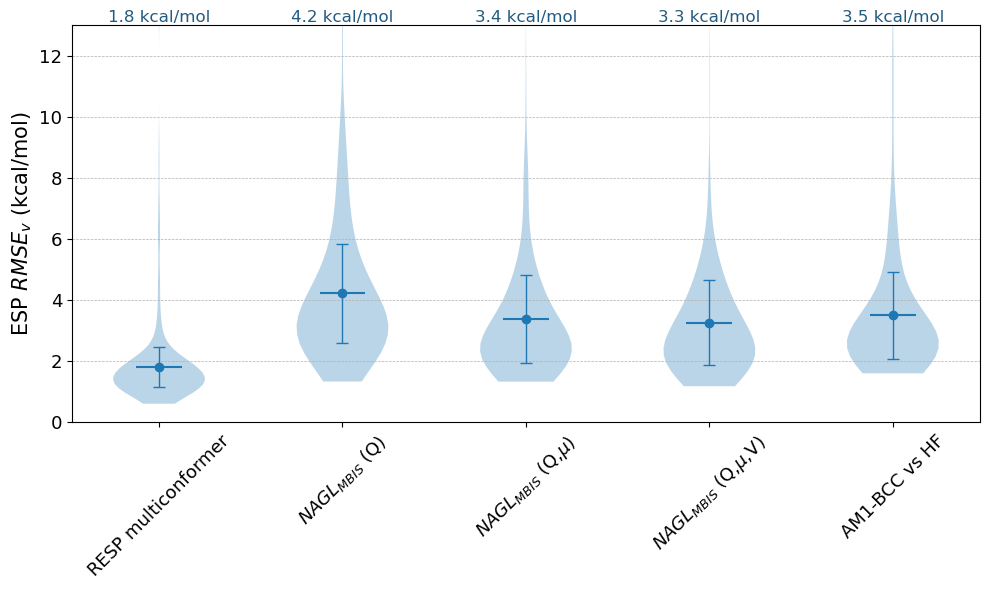

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.size'] = 10          # Base font size
mpl.rcParams['axes.labelsize'] = 15     # Axis label font size
mpl.rcParams['legend.fontsize'] = 15
mpl.rcParams['xtick.labelsize'] =13
mpl.rcParams['ytick.labelsize'] = 13

grouped = df.groupby("smiles")

# Collect standard deviations across atoms for each chcompare_columnsarge model
std_deviation_data = {model: [] for model in compare_columns}

for smiles, group in grouped:
    for model in compare_columns:
        # Stack esps across conformers for the current model
        esps = np.vstack(group[model].to_list())  # Shape: (num_conformers, num_atoms)
        # Compute standard deviation for each atom across conformers
        # std_deviation = np.std(esps, axis=0)  # Shape: (num_atoms,)
        # # Add to the dataset for the box plot
        # std_deviation_data[model].extend(std_deviation)
        
# mean_std_deviation = {model: np.mean(std_deviation_data[model]) for model in compare_columns}

plt.figure(figsize=(10, 6))
violin_data = [df[model] for model in compare_columns]
violin_data = [df[model].to_numpy() for model in compare_columns]
violin_data = [df[model].dropna().values for model in compare_columns]


# Draw the violin plot with means displayed
parts = plt.violinplot(
    violin_data,
    showmeans=True,  # show the green mean lines inside violins
    showextrema=False,
    showmedians=False
)


# Mark means and std deviations with error bars
for i, model in enumerate(compare_columns, start=1):
    mean_val = violin_data[i-1].mean()
    std_val = np.array(violin_data[i-1]).std()/2
    print(std_val)
    # Use errorbar to create vertical lines with top/bottom caps (±1 std)
    plt.errorbar(
        i,                  # x-position
        mean_val,           # y-position (the mean)
        yerr=std_val,       # the error margin for top/bottom
        fmt='o',            # marker style
        color="#1f77b4",    # color for the marker
        ecolor="#1f77b4",   # color for the error bars
        elinewidth=1,       # thickness of the error bar lines
        capsize=4,          # length of the top/bottom caps
        capthick=1,         # thickness of the cap lines
        zorder=3
    )
    
    # Optionally add text to label the mean above the error bar
    plt.text(
        i,
        13,          # small offset above the mean point
        f"{mean_val:.1f} kcal/mol",
        ha="center",
        va="bottom",
        color="#225b82",           # text color
        fontsize=12,
        zorder=4
    )

# Optionally limit the y-axis for better visibility
plt.ylim(0, 13)
labels = ['RESP multiconformer', '$NAGL_{MBIS}$ (Q)','$NAGL_{MBIS}$ (Q,$\mu$)','$NAGL_{MBIS}$ (Q,$\mu$,V)','AM1-BCC vs HF'] 
# Add labels and grid
plt.xticks(range(1, len(compare_columns) + 1), labels, rotation=45)
plt.ylabel('ESP $RMSE_{v}$ (kcal/mol)', fontsize=15)
plt.grid(axis="y", linestyle='--', linewidth=0.5)
plt.savefig("conformer_test_charges.png", dpi=400, bbox_inches="tight")
plt.tight_layout()
plt.show()


In [ ]:
violin_data[0].std()

1.3063429508201936